In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\akash\Downloads\10_Property_stolen_and_recovered.csv",encoding = 'latin1')

In [4]:
df.dropna()

,ï»¿Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
...,...,...,...,...,...,...,...,...
2444,Tamil Nadu,2010,Total Property,7. Total Property Stolen & Recovered,16125,21509,660311804,1317919190
2445,Tripura,2010,Total Property,7. Total Property Stolen & Recovered,192,879,5666102,33032746
2446,Uttar Pradesh,2010,Total Property,7. Total Property Stolen & Recovered,9130,35068,577591772,1442670414
2447,Uttarakhand,2010,Total Property,7. Total Property Stolen & Recovered,964,2234,47135685,123398840


In [5]:
df.rename(columns={'ï»¿Area_Name': 'Area_Name'}, inplace=True)

In [6]:
df.sort_values(by='Cases_Property_Stolen', ascending=False, inplace=True)

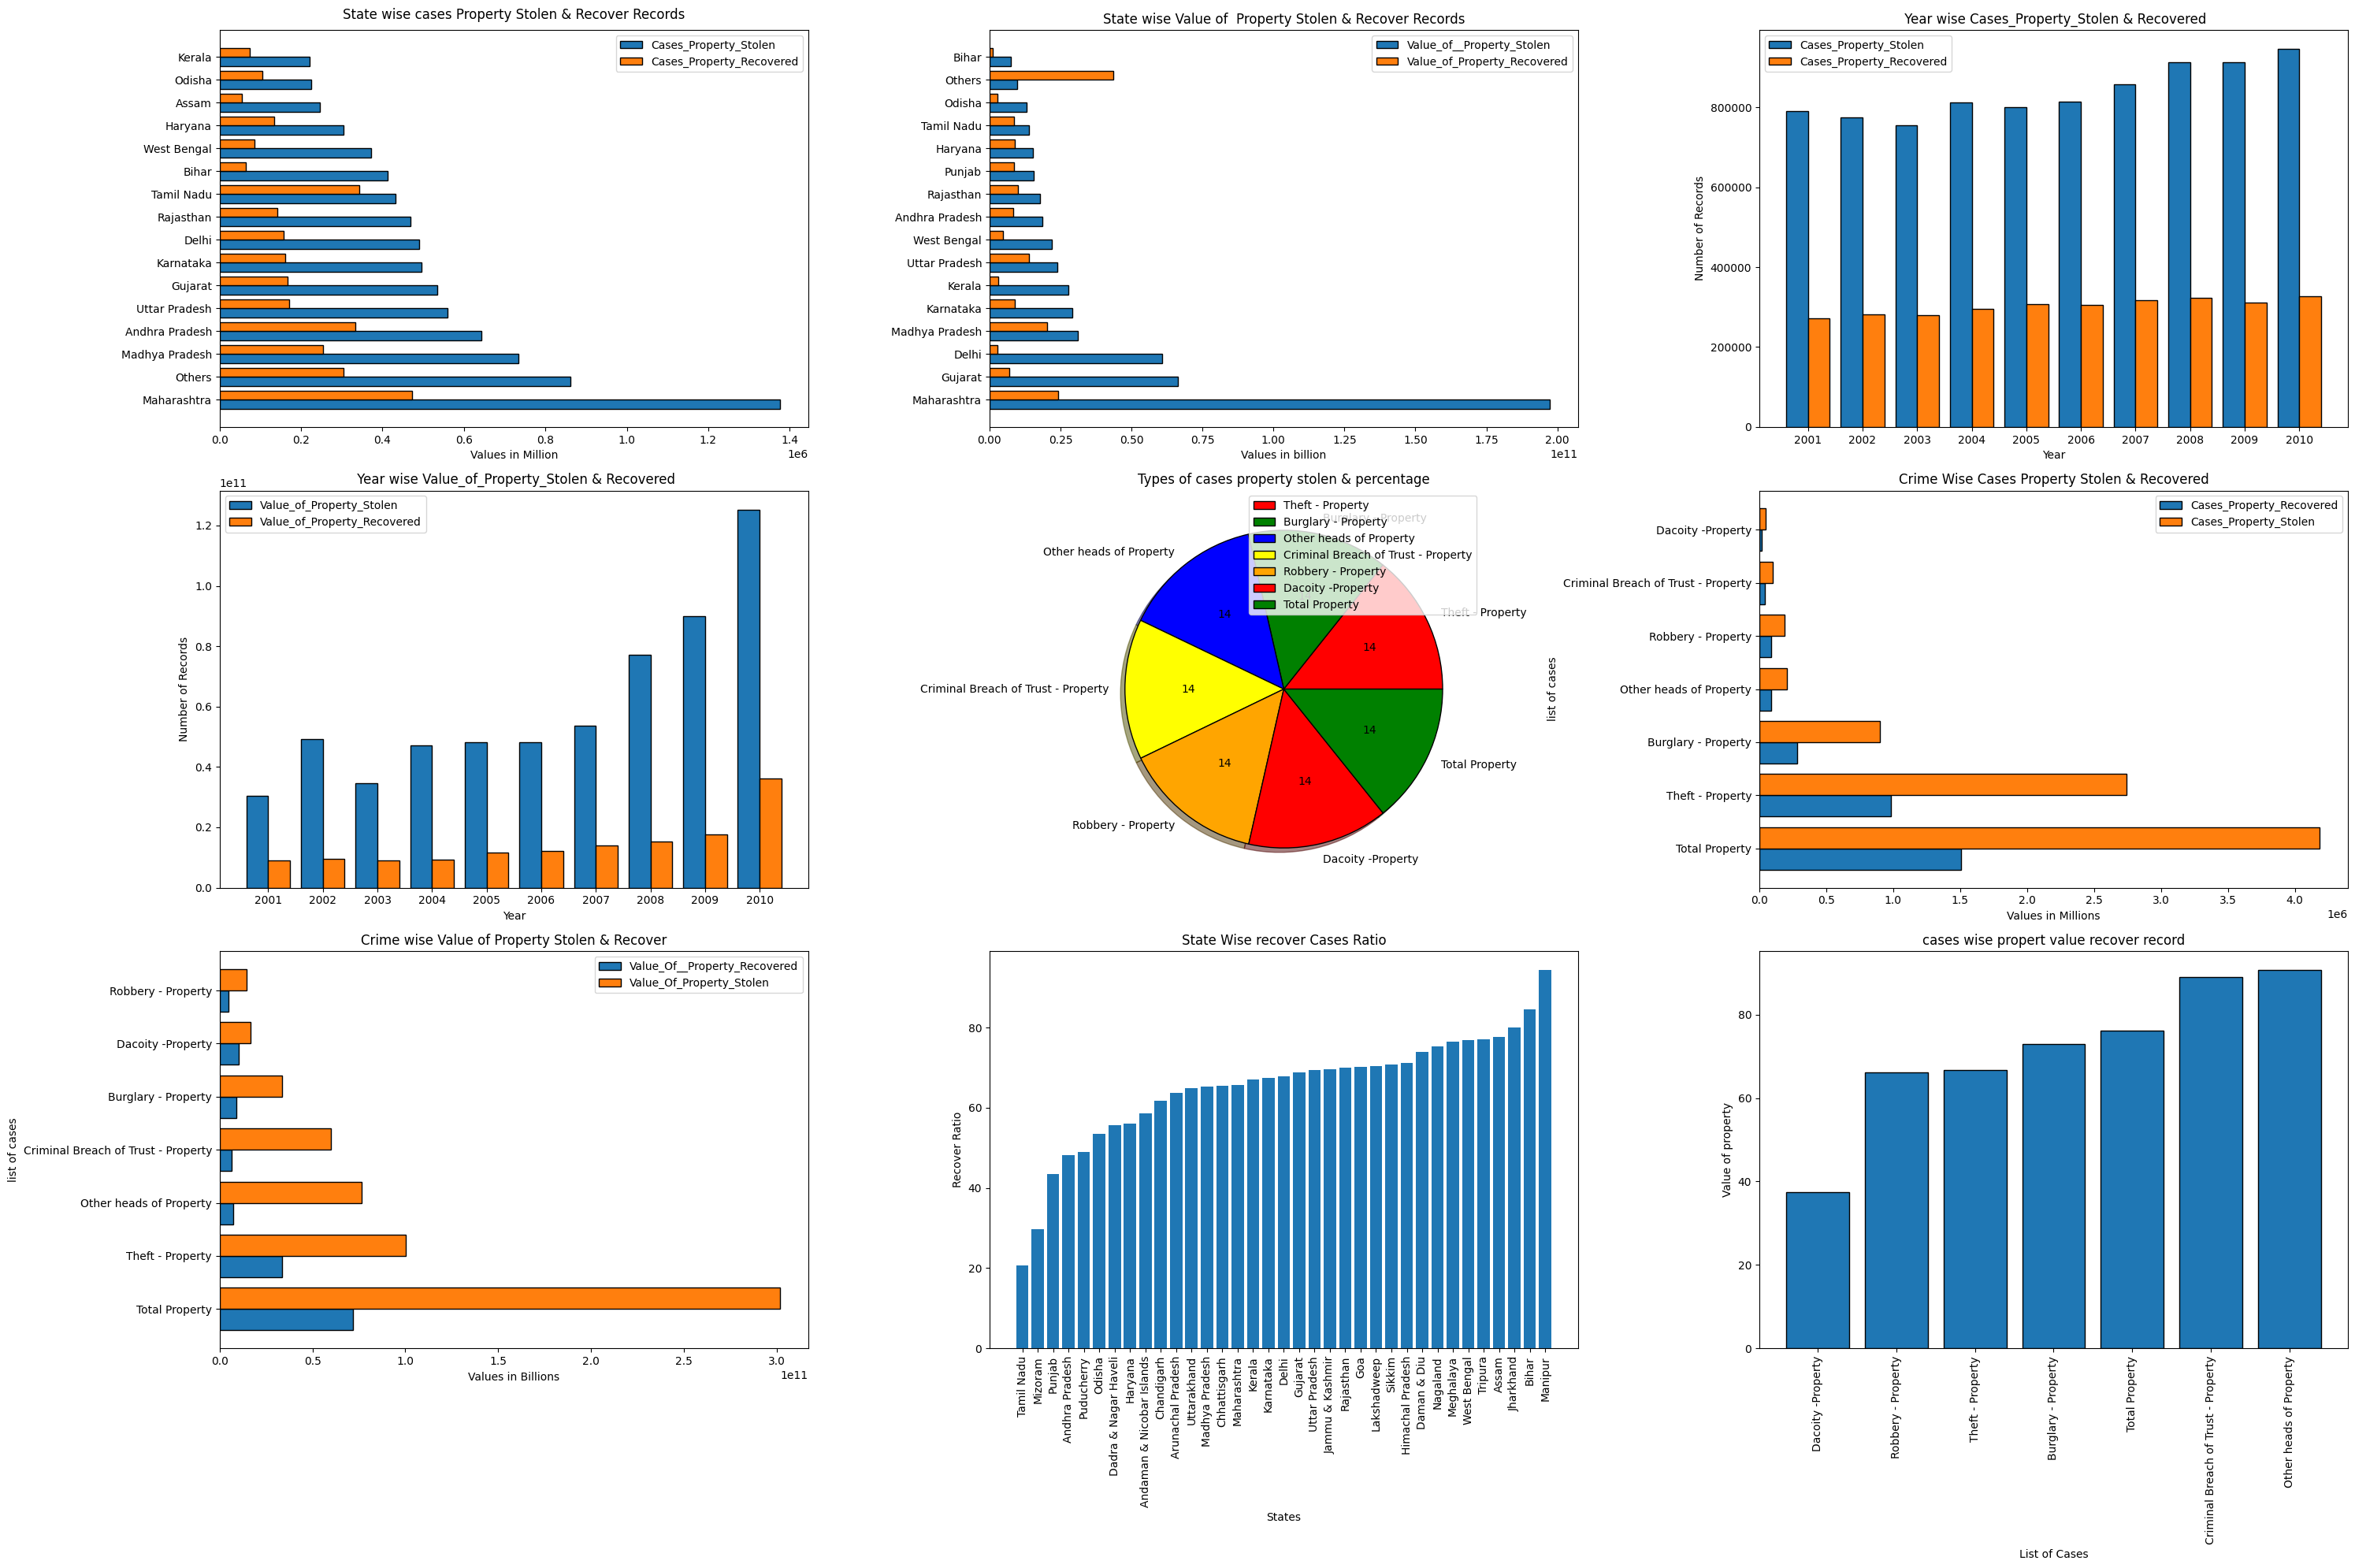

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (30,20))
plt.subplot(3,3,1)
new_df1 = df[['Area_Name', 'Cases_Property_Recovered', 'Cases_Property_Stolen']].groupby('Area_Name').sum().reset_index()
new_df1.sort_values('Cases_Property_Stolen', ascending=False, inplace=True, ignore_index=True)
a = new_df1.loc[15:,'Cases_Property_Recovered'].sum()
b = new_df1.loc[15:,'Cases_Property_Stolen'].sum()
new_df1.loc[15,:]=['Others', a,b]
new_df1 = new_df1.head(16)
new_df1.sort_values('Cases_Property_Stolen', ascending=False, inplace=True, ignore_index=True)
w = 0.4
d = new_df1.Cases_Property_Stolen
e = new_df1.Cases_Property_Recovered
v = new_df1.Area_Name
bar1 = np.arange(len(v))
bar2 = [i+w for i in bar1]
plt.barh(bar1,d.values,w,edgecolor = 'black', label ='Cases_Property_Stolen')
plt.barh(bar2,e.values,w,edgecolor = 'black', label = 'Cases_Property_Recovered')
plt.yticks(bar1+w/2,v)
plt.xlabel("Values in Million")
plt.title ("State wise cases Property Stolen & Recover Records", pad=10)
plt.legend()

plt.subplot(3,3,2)
new_df2 = df[['Area_Name','Value_of_Property_Stolen','Value_of_Property_Recovered']].groupby('Area_Name').sum().reset_index()
new_df2.sort_values('Value_of_Property_Stolen',inplace = True, ascending = False, ignore_index=True)
a = new_df2.loc[15:,'Value_of_Property_Recovered'].sum()
b = new_df2.loc[15:,'Value_of_Property_Stolen'].sum()
new_df2.loc[15,:]=['Others', a,b]
new_df2 = new_df2.head(16)
new_df2.sort_values('Value_of_Property_Stolen', ascending=False, inplace=True, ignore_index=True)
w = 0.4
d= new_df2.Value_of_Property_Stolen
e = new_df2.Value_of_Property_Recovered
v = new_df2.Area_Name
bar1 = np.arange(len(v))
bar2 = [i+w for i in bar1]
plt.barh(bar1,d.values,w,edgecolor = 'black', label ='Value_of__Property_Stolen')
plt.barh(bar2,e.values,w,edgecolor = 'black', label = 'Value_of_Property_Recovered')
plt.yticks(bar1+w/2,v)
plt.xlabel("Values in billion")
plt.title ("State wise Value of  Property Stolen & Recover Records")
plt.legend()

plt.subplot(3,3,3)
new_ta = df.groupby("Year").agg({"Cases_Property_Stolen":'sum', 'Cases_Property_Recovered':'sum',"Value_of_Property_Stolen":"sum","Value_of_Property_Recovered":"sum"}).reset_index()
new_ta.sort_values("Year",inplace = True ,)
x = new_ta['Year']
value1 = new_ta["Cases_Property_Stolen"]
value2 = new_ta["Cases_Property_Recovered"]
w = 0.4
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
plt.bar(bar1,value1,w,label = "Cases_Property_Stolen",edgecolor = 'black')
plt.bar(bar2,value2,w,label = "Cases_Property_Recovered",edgecolor = 'black')
plt.xticks(bar1+w/2,x)
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.title(" Year wise Cases_Property_Stolen & Recovered")
plt.legend()

plt.subplot(3,3,4)
x = new_ta['Year']
value3 = new_ta["Value_of_Property_Stolen"]
value4 = new_ta["Value_of_Property_Recovered"]
w = 0.4
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
plt.bar(bar1,value3,w,label = "Value_of_Property_Stolen",edgecolor = 'black')
plt.bar(bar2,value4,w,label = "Value_of_Property_Recovered",edgecolor = 'black')
plt.xticks(bar1+w/2,x)
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.title(" Year wise Value_of_Property_Stolen & Recovered")
plt.legend()



plt.subplot(3,3,5)
values_1 = df['Group_Name'].value_counts().reset_index()
count = values_1['count']
gro_name = values_1['Group_Name']
colour = ['red','green','blue','yellow','orange']
wp = {'linewidth': 1, 'edgecolor': "black"}
plt.pie(count,labels = gro_name,shadow = True,autopct='%.f',colors = colour,wedgeprops=wp, textprops=dict(color="black"))
plt.title("Types of cases property stolen & percentage")

plt.legend(gro_name)




plt.subplot(3,3,6)
dl = df.groupby('Group_Name').agg({'Cases_Property_Recovered':'sum','Cases_Property_Stolen':'sum','Value_of_Property_Recovered':'sum','Value_of_Property_Stolen':'sum'})
ds = dl.sort_values('Cases_Property_Stolen',ascending = False).reset_index()
s = ds['Group_Name']
t = ds['Cases_Property_Recovered']
u = ds['Cases_Property_Stolen']
w = 0.4
bar1 = np.arange(len(s))
bar2 = [i+w for i in bar1]
plt.barh(bar1,t,w,edgecolor = 'black',label ='Cases_Property_Recovered' )
plt.barh(bar2,u,w,edgecolor = 'black',label = 'Cases_Property_Stolen')
plt.xlabel("Values in Millions")
plt.ylabel("list of cases")
plt.title("Crime Wise Cases Property Stolen & Recovered")
plt.yticks(bar1+w/2,s)
plt.legend()

plt.subplot(3,3,7)
ds1 =dl.sort_values('Value_of_Property_Stolen',ascending = False).reset_index()
s = ds1.Group_Name
v = ds1.Value_of_Property_Recovered
z = ds1.Value_of_Property_Stolen
w = 0.4
bar1 = np.arange(len(s))
bar2 = [i+w for i in bar1]
plt.barh(bar1,v,w,edgecolor = 'black',label ='Value_Of__Property_Recovered' )
plt.barh(bar2,z,w,edgecolor = 'black',label = 'Value_Of_Property_Stolen')
plt.xlabel("Values in Billions")
plt.ylabel("list of cases")
plt.title("Crime wise Value of Property Stolen & Recover")
plt.yticks(bar1+w/2,s)
plt.legend()

plt.subplot(3,3,8)
dk = df.groupby("Area_Name").agg({"Cases_Property_Recovered":"sum","Cases_Property_Stolen":"sum"}).reset_index()
dk["Cases Recover Ratio"] = ((dk["Cases_Property_Stolen"]-dk["Cases_Property_Recovered"])/dk["Cases_Property_Stolen"])*100
dk.sort_values(by = "Cases Recover Ratio",inplace = True)
plt.bar(dk["Area_Name"],dk["Cases Recover Ratio"])
plt.xlabel("States")
plt.ylabel("Recover Ratio")
plt.title("State Wise recover Cases Ratio")
plt.xticks(rotation = 90)

plt.subplot(3,3,9)
dn = df.groupby("Group_Name").agg({"Value_of_Property_Recovered":"sum","Value_of_Property_Stolen":"sum"}).reset_index()
dn["Values of Recover Ratio"] = ((dn["Value_of_Property_Stolen"]-dn["Value_of_Property_Recovered"])/dn["Value_of_Property_Stolen"])*100
dn.sort_values(by = "Values of Recover Ratio",inplace = True)
plt.bar(dn["Group_Name"],dn["Values of Recover Ratio"],edgecolor = "black")
plt.xlabel("List of Cases")
plt.title("cases wise propert value recover record")
plt.ylabel("Value of property")
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()